In [39]:
import json
import pandas as pd
import numpy as np
from ete3 import Tree, faces, AttrFace, TreeStyle, NodeStyle, TextFace

In [51]:
df = pd.read_csv('../dataframes/h3n2_ha_12y_hi_egg.csv')
clade_muts = pd.read_csv('../results/kk_clades_h3n2_ha_12y_hi.csv')

In [52]:
clade_muts.head()

,kk_clade,clade_mrca,aa_muts,nt_muts
0,c1,NODE_0002901,"{'HA1': ['E62G', 'R142G']}","['A233G', 'A472G']"
1,c2,NODE_0002467,"{'HA1': ['T131K', 'R261Q']}","['C440A', 'T441A', 'C465T', 'T705C', 'G830A', ..."
2,c3,NODE_0002730,{'HA1': ['N121K']},['C411A']
3,c4,NODE_0002664,"{'HA1': ['N171K'], 'HA2': ['G155E']}","['A234G', 'T561G', 'G1269A', 'G1499A']"
4,c5,NODE_0001875,"{'HA1': ['L3I', 'S91N', 'N144K', 'F193S'], 'HA...","['A26G', 'C55A', 'T183C', 'G320A', 'G375A', 'T..."


In [84]:
def add_mut_labels(label_branch, n):
    for k,v in clade_muts.iterrows():
        if v['kk_clade'] == label_branch:
            label_mut = TextFace(v['aa_muts'])
            n.add_face(label_mut, column=0, position = "branch-bottom")

In [86]:
t = Tree("((((((((((((c1, c3), c4), c2), c7), c9), ((((c5,c6),c8), c10), c11)), c12), (c13, c14)), (c15, c16)), c17), c18), unassigned);")


def layout(node):
    if node.is_leaf():
        N = AttrFace("name", fsize=20)
        faces.add_face_to_node(N, node, 0)
  

ts = TreeStyle()

n1 = t.get_common_ancestor("c1", "c3")
add_mut_labels("c3", n1)
n2 = t.get_node("c1")
add_mut_labels("c1", n2)
# n1.add_face(mundo, column=1, position = "branch-bottom")
ts.layout_fn = layout
# ts.scale =  80 
ts.show_leaf_name = False
ts.tree_width = 800
t.render("%%inline", tree_style = ts)



AttributeError: 'TreeNode' object has no attribute 'get_node'

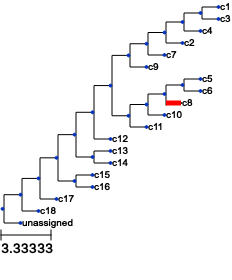

In [30]:
clade_counts_df = df.groupby('kk_clade').size().reset_index().rename(columns={0:'clade_size'})
clade_counts = clade_counts_df.set_index('kk_clade').T.to_dict('list')

style1 = NodeStyle()
style1["fgcolor"] = "#0f0f0f"
style1["size"] = 1
style1["vt_line_color"] = "#ff0000"
style1["hz_line_color"] = "#ff0000"
style1["vt_line_width"] = 2
style1["hz_line_width"] = 5
style1["vt_line_type"] = 0 # 0 solid, 1 dashed, 2 dotted
style1["hz_line_type"] = 0
for l in t.iter_leaves():
#     print(clade_counts[l.name])
    if l.name == 'c8':
        l.img_style = style1
t.render("%%inline")  